In [226]:
import torch
import os
import re
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
def load_comm(model_name):
    vocabs = {}
    for file in os.listdir(model_name):
        nr_updates = int(file[:-3])
        orig_tensor = torch.load(model_name+'/'+file)
        t = orig_tensor.view(-1, orig_tensor.shape[2], orig_tensor.shape[3])
        vocabs[nr_updates] = t
    return vocabs

In [216]:
vocabs = load_comm('BabyAI-GoToObj-v0_1_2_3_full_vision_19-03-13-18-35-18')

180
60
100
120
160
200
140
80
20
40


In [217]:
def word_stats(vocab):
    num_utter, message_length, vocab_size = vocab.shape
    word_dists = []
    for i in range(message_length):
        word = vocab[:,i,:].squeeze()
        stats = torch.mean(word, dim=0)
        dist = list(stats.detach().numpy())
        word_dists.append(dist)
    return word_dists

In [218]:
def plot_stats(nr_updates, word_dists, message_length, vocab_size):
    fig = plt.figure(figsize=(10,4))
    fig.suptitle("Word distributions after "+str(nr_updates)+" updates", fontsize=14)
    for i in range(message_length):
        dist = word_dists[i]
        ax= fig.add_subplot(1, message_length, i+1)
        ax.set_aspect(3)
        plt.axis([-0.5, 2.5, 0, 1])
        plt.xlabel('words')
        plt.ylabel('usage distribution')
        plt.subplots_adjust(hspace=1)
        plt.title(str(i+1) + ". word in the sentence")
        plt.bar(list(range(vocab_size)), dist)

In [219]:
word_dists= word_stats(v)

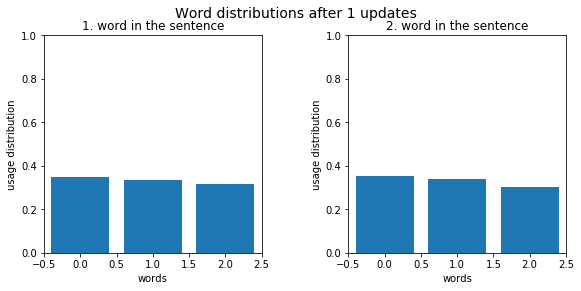

In [206]:
plot_stats(1, word_dists, 2,3)

In [227]:
def plot_evolution(vocabs):
    ordered_vocabs = collections.OrderedDict(sorted(vocabs.items()))
    for nr_updates, vocab in sorted(vocabs.items()):
        word_dists = word_stats(vocab)
        plot_stats(nr_updates, word_dists, vocab.shape[1], vocab.shape[2])

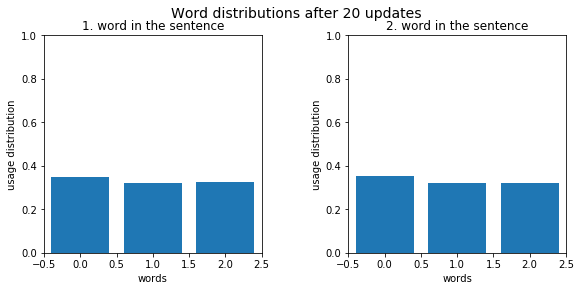

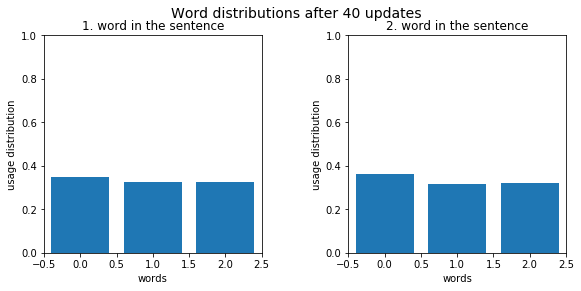

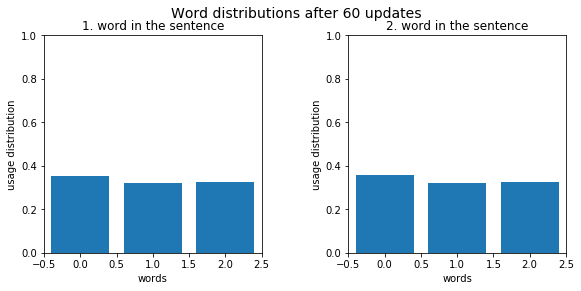

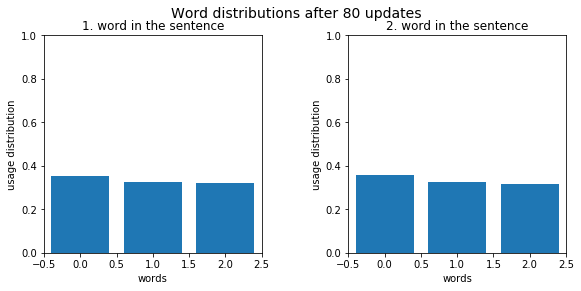

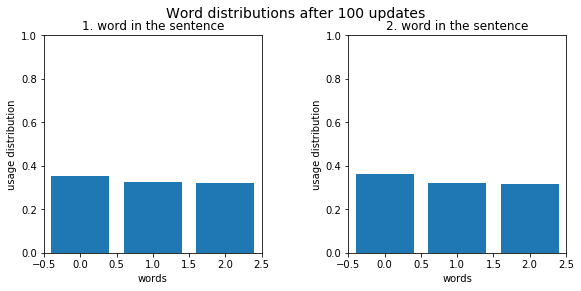

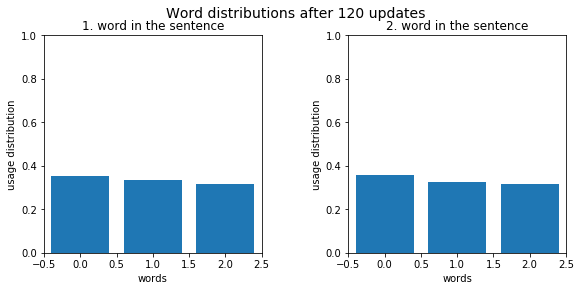

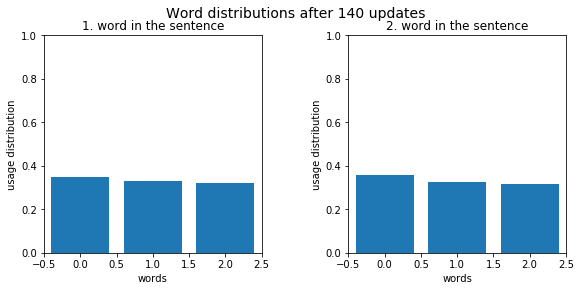

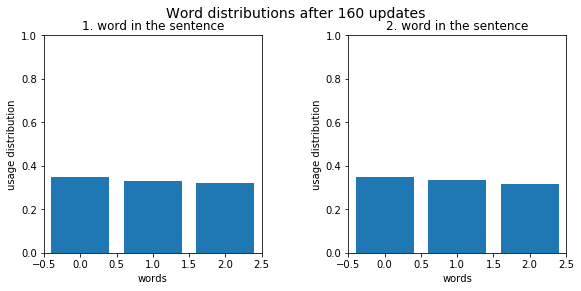

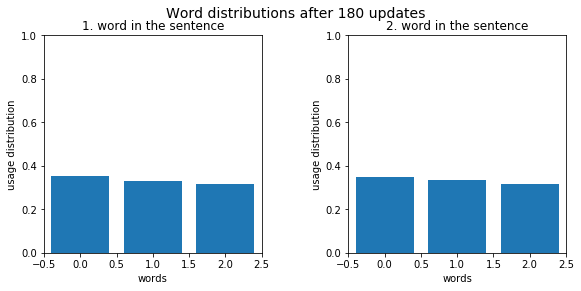

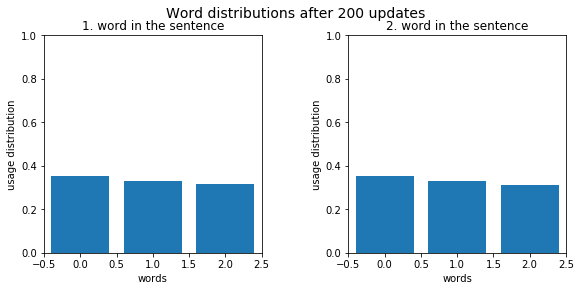

In [228]:
plot_evolution(vocabs)